In [43]:
# Import the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

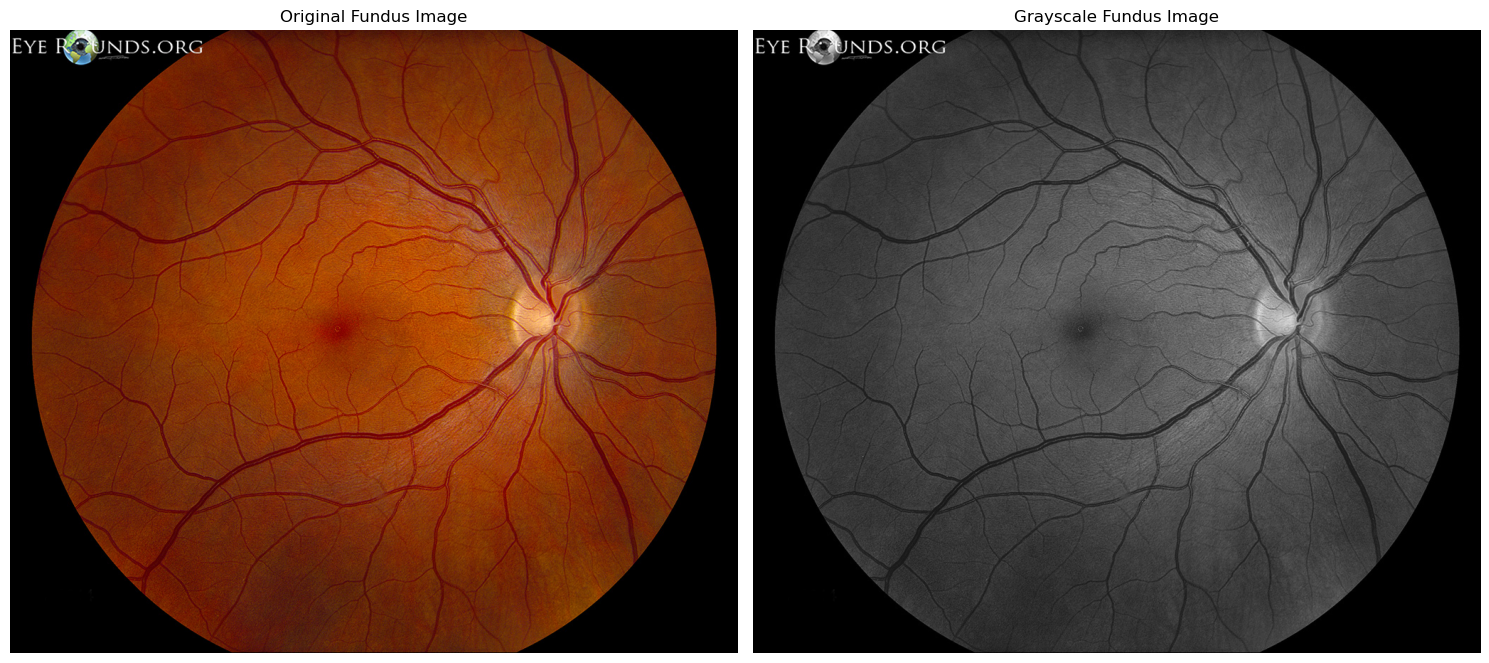

In [44]:
# Load the color fundus image
image_path = "Normal-fundus-LRG.jpg"  # Replace with the path to your image
fundus_image = cv2.imread(image_path)

# Convert to RGB (OpenCV loads images in BGR format by default)
fundus_image_rgb = cv2.cvtColor(fundus_image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
fundus_gray = cv2.cvtColor(fundus_image, cv2.COLOR_BGR2GRAY)

# Plot the results side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(fundus_image_rgb)
axes[0].set_title("Original Fundus Image")
axes[0].axis("off")

# Display the grayscale image
axes[1].imshow(fundus_gray, cmap="gray")
axes[1].set_title("Grayscale Fundus Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [45]:
# Define Parameters for different image enhancement techniques
# CLAHE parameters
clipLimit = 2.0
tileGridSize = (8, 8)

# Gamma Correction Parameter
gamma = 0.9

# Un-sharp Masking Parameters
size_of_kernel = (3, 3)
weight_original_image = 1.2
weight_blurred_image = -0.2
bias = 0

In [46]:
# Method 1: Histogram Equalization
# Histogram is a graphical representation of the intensity distribution of an image
# Histogram equalization redistributes these pixel intensity values so that the image has better contrast.
# This means spreading the intensity values more evenly across the available range (from dark to bright), making sure that the image uses the full range of brightness levels effectively.
fundus_equalized = cv2.equalizeHist(fundus_gray)

# Method 2: CLAHE (Contrast Limited Adaptive Histogram Equalization)
# It divides the image into small blocks called "tiles" and applies histogram equalization to each tile (Local Histogram Equalization)
# Clipping is applied to limit the contrast amplification to avoid over-amplification of noise
clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
fundus_clahe = clahe.apply(fundus_gray)

# Method 3: Gamma Correction
# It is used to adjust the brightness of an image by using a nonlinear operation
# Normalizes the image intensity values to the range [0, 1]
# Applies the gamma correction (inv_gamma) function to the normalized image
# Rescales the image intensity values back to the range [0, 255]
# Updates every pixel value in the image using the lookup table (LUT) created
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_corrected_image = gamma_correction(fundus_gray, gamma=gamma)

# Method 4: Un-sharp Masking
# Apply Gaussian Blur to the image (Smoothing or Removing Noise) Equivalent to Low Pass Filter
# (3,3) is the kernel size to blur the image and 0 calculates the standard deviation of the kernel automatically
# Weighted sum of the original image and the blurred image to sharpen the edges with 120% weight on the original image and -20% weight on the blurred image equivalent to High Pass Filter
# 0 is the bias added to the sum
# The result is an image with sharpened edges
blurred = cv2.GaussianBlur(fundus_gray, size_of_kernel, 0)
un_sharp_image = cv2.addWeighted(fundus_gray, weight_original_image, blurred, weight_blurred_image, bias)

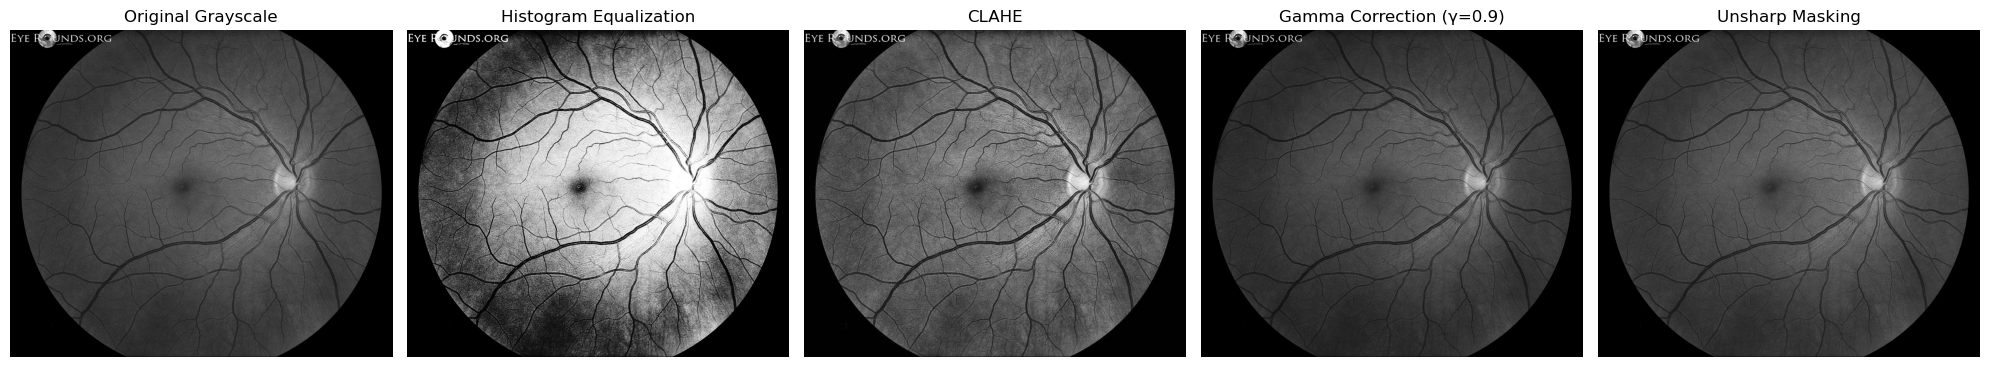

In [47]:
# Plot all the results side by side for comparison
figure , axes = plt.subplots(1, 5, figsize=(20, 10))
axes[0].imshow(fundus_gray, cmap='gray')
axes[0].set_title("Original Grayscale")
axes[0].axis("off")

axes[1].imshow(fundus_equalized, cmap='gray')
axes[1].set_title("Histogram Equalization")
axes[1].axis("off")

axes[2].imshow(fundus_clahe, cmap='gray')
axes[2].set_title("CLAHE")
axes[2].axis("off")

axes[3].imshow(gamma_corrected_image, cmap='gray')
axes[3].set_title("Gamma Correction (γ=0.9)")
axes[3].axis("off")

axes[4].imshow(un_sharp_image, cmap='gray')
axes[4].set_title("Unsharp Masking")
axes[4].axis("off")

plt.tight_layout()
plt.show()